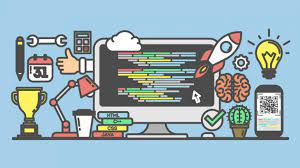

In [ ]:
robot_art = r"""
      0: {head_name}
      Is available: {head_status}
      Attack: {head_attack}                              
      Defense: {head_defense}
      Energy consumption: {head_energy_consump}
              ^
              |                  |1: {weapon_name}
              |                  |Is available: {weapon_status}
     ____     |    ____          |Attack: {weapon_attack}
    |oooo|  ____  |oooo| ------> |Defense: {weapon_defense}
    |oooo| '    ' |oooo|         |Energy consumption: {weapon_energy_consump}
    |oooo|/\_||_/\|oooo|          
    `----' / __ \  `----'           |2: {left_arm_name}
   '/  |#|/\/__\/\|#|  \'           |Is available: {left_arm_status}
   /  \|#|| |/\| ||#|/  \           |Attack: {left_arm_attack}
  / \_/|_|| |/\| ||_|\_/ \          |Defense: {left_arm_defense}
 |_\/    O\=----=/O    \/_|         |Energy consumption: {left_arm_energy_consump}
 <_>      |=\__/=|      <_> ------> |
 <_>      |------|      <_>         |3: {right_arm_name}
 | |   ___|======|___   | |         |Is available: {right_arm_status}
// \\ / |O|======|O| \  //\\        |Attack: {right_arm_attack}
|  |  | |O+------+O| |  |  |        |Defense: {right_arm_defense}
|\/|  \_+/        \+_/  |\/|        |Energy consumption: {right_arm_energy_consump}
\__/  _|||        |||_  \__/        
      | ||        || |          |4: {left_leg_name} 
     [==|]        [|==]         |Is available: {left_leg_status}
     [===]        [===]         |Attack: {left_leg_attack}
      >_<          >_<          |Defense: {left_leg_defense}
     || ||        || ||         |Energy consumption: {left_leg_energy_consump}
     || ||        || || ------> |
     || ||        || ||         |5: {right_leg_name}
   __|\_/|__    __|\_/|__       |Is available: {right_leg_status}
  /___n_n___\  /___n_n___\      |Attack: {right_leg_attack}
                                |Defense: {right_leg_defense}
                                |Energy consumption: {right_leg_energy_consump}
                                
"""



In [ ]:
class part():

    def __init__(self, name, attack_level=0, defense_level=0, energy_consumption=0):
        self.name=name
        self.attack_level=attack_level
        self.defense_level=defense_level
        self.energy_consumption=energy_consumption

    def get_status_dict(self):
        formatted_name= self.name.replace(" ","_").lower()
        return{
            "{}_name".format(formatted_name): self.name.upper(), 
            "{}_status".format(formatted_name): self.is_available(),
            "{}_attack".format(formatted_name): self.attack_level,
            "{}_defense".format(formatted_name): self.defense_level, 
            "{}_energy_consump".format(formatted_name): self.energy_consumption,
        }

    def is_available(self):
        return not self.defense_level <= 0


colors ={
    "Black": '\x1b[90m',
     "Blue": '\x1b[94m', 
     "Cyan": '\x1b[96m',
     "Green": '\x1b[92m',
     "Magenta": '\x1b[95m',
     "Red": '\x1b[91m',
     "white": '\x1b[97m',
     "Yellow":'\x1b[93m',
}

coins={0:4,1:1,2:3,3:3,4:2,5:2}

defense_0=0

class Robot:
    def __init__(self,name,color_code):
      self.name=name
      self.color_code= color_code
      self.energy=100
      self.parts=[
          part("Head",attack_level=6, defense_level=8,energy_consumption=4),
          part("Weapon", attack_level=20, defense_level=2, energy_consumption=13),
          part("Left Arm", attack_level=4, defense_level=16, energy_consumption=19), 
          part("Right Arm", attack_level=6, defense_level=22, energy_consumption=10),
          part("Left Leg", attack_level=4, defense_level=22, energy_consumption=16),
          part("Right Leg", attack_level=8, defense_level=22, energy_consumption=17),
          ]


    def greet(self):
      print("Hello, my name is ",self.name)


    def print_energy(self):
      print("we have ",self.energy,"percent energy left")    


    def attack(self, enemy_robot, part_to_use, part_to_attack):
       enemy_robot.parts[part_to_attack].defense_level -= self.parts[part_to_use].attack_level
       self.energy -= self.parts[part_to_use].energy_consumption


    def is_on(self):
      return self.energy>=0

    def is_there_available_parts(self):
        for part in self.parts:
            if part.is_available():
                return True
            return False

      
    def print_status(self):
        print(self.color_code)
        str_robot = robot_art.format(**self.get_part_status())
        self.greet()
        self.print_energy()
        print(str_robot)
        print(colors["white"])


    def get_part_status(self):
        part_status = {}
        for part in self.parts:
            status_dict = part.get_status_dict()
            part_status.update(status_dict)
        return  part_status





def play ():
    playing = True
    print("Welcome to the game")
    robot_one = Robot("Termineitor", colors["Green"])
    robot_two = Robot("Prime", colors["Yellow"])
    rount = 0
    won_coins_2 = 0
    won_coins_1 = 0
    trade=0
    while playing:
        if rount % 2 == 0:
           current_robot = robot_one
           enemy_robot = robot_two
        else:
            current_robot = robot_two
            enemy_robot = robot_one
        current_robot.print_status()
        print("Waht part should i use to attack? ")
        part_to_use = input("Choose a number part: ")
        part_to_use = int(part_to_use)

        enemy_robot.print_status()
        print("Which part of the enemy should we attack?")
        part_to_attack = input ("choose a enemy part to attack: ")
        part_to_attack = int(part_to_attack)
       


        while  current_robot == robot_one:

            if  part_to_attack in coins: 
                won_coins_1 += coins.get(part_to_attack)
            else:
                print("selecciona una parte valida")

            print("Monedas actuales jugador 1",won_coins_1)
            print("__Quiere ingresar a la tienda?__Recuerda que solo puedes ingresar 2 veces")
            print("__si es asi ingresa yes__")
            print("__si no es asi ingresa No__")
            store=input("__Ingresa tu opcion__")
            if store == "yes" and trade < 2 :
              print("__Bienvenido a la tienda__")
              print(" __¿Que deseas mejorar en esta partida?__")
              print("__Para mejorar tu robot ingresa 1 o 2 teniendo en cuenta que:__")
              print("__1° es para mejora en defensa__")
              print("__2° es para mejora en ataque__")
              upgrade = input("__Ingresa tu opcion__ ")
              if upgrade == 1:
                 print("_¿Que parte deseas mejorar?__")
                 print("0°Head")
                 print("1°Weapon")
                 print("2°Left Arm")
                 print("3°Right Arm")
                 print("4°Left Leg")
                 print("5°Right Leg")
                 print("Para seleccionar la parte que deseas, ingresa el numero al que corresponde la parte")
                 upgrade_part=input("__Ingresa tu opcion__ ")
                 if upgrade_part ==1:
                   print("Tienes:  ",won_coins_1,"monedas" )
                   spent_coins=input("__Ingresa la cantidad de monedas que quieras gastar__")
                   won_coins_1-=spent_coins
                   defense_0=spent_coins*0.1
                   current_robot.parts[upgrade_part].defense_level+=defense_0

                   list_parts = list(Robot.self.parts)
                   list_best = [i + defense_0 for i in list_parts if i == part.defense_level]

                   def get_part_upgrade_part():
                       part_upgrade_part = { }
                       for part in Robot.self.parts:
                         upgrade_parts = list_best
                         part_upgrade_part.update(upgrade_parts)
                       return  part_upgrade_part
                  
                   def print_status_best_shop():
                       str_robot = robot_art.format(**get_part_upgrade_part())
                       Robot.self.greet()
                       Robot.self.print_energy()
                       print(str_robot)
                   
                   
                   current_robot.print_status_best_shop()





            trade +=1
            


            current_robot = None
        while  current_robot == robot_two:

            if  part_to_attack in coins: 
                 won_coins_2 += coins.get(part_to_attack)
            else:
                print("selecciona una parte valida")
            print(won_coins_2)
            current_robot = None
            
        
        if rount % 2 == 0:
                current_robot = robot_one
                enemy_robot = robot_two
        else:
                current_robot = robot_two
                enemy_robot = robot_one

        current_robot.attack(enemy_robot, part_to_use, part_to_attack)
        rount += 1
        

        if not enemy_robot.is_on() or enemy_robot.is_there_available_parts() == False:
            playing = False
            print("Congratulations, you won")
            print(current_robot.name)

play()